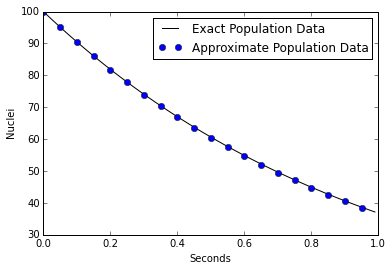

In [78]:
#Imports
%matplotlib inline
from math import exp
import pylab as plt
import numpy as np


#Functions
def finalPopulation(iPop,decay,fTime):
    """This gives the exact value of the population given an initial population, decay constant, and final time"""
    fPop=iPop*exp(-decay*fTime)
    return fPop

def numericalPopulation(nNaught,decay,fTime):
    """This gives a Taylor series approximation of the population given and initial population, decay constant, and final time"""
    fPop=nNaught*(1-decay*fTime)
    return fPop

#Variable Declarations/Initializations
decay=1 #a constant decay constant
recursPop=iPop=cApprox=100 # a constant initial population and recursion population
numPoints=100 #user defined number of points
cTime=0 #initializing current time
time=[] #used to pass values into exact
Nexact=[] #nuclei exactly
Napprox=[] #nuclei approximately


for i in range(numPoints):
    time.append(cTime)
    
    Nexact.append(finalPopulation(iPop,decay,time[i]))
    
    Napprox.append(cApprox)
    
    cApprox=numericalPopulation(recursPop,decay,1/numPoints)

    recursPop=cApprox
    
    cTime+=1/numPoints

plt.plot(time,Nexact,"k-",label="Exact Population Data")
plt.plot(time,Napprox,"bo",label="Approximate Population Data",markevery=5)
plt.ylabel("Nuclei")
plt.xlabel("Seconds")
plt.legend(loc="best")
plt.show()

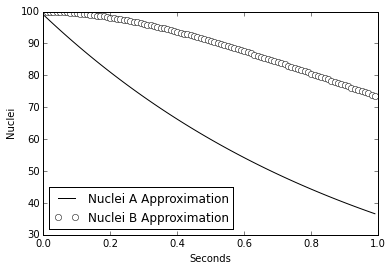

In [85]:
#Function Definitions
def nucleiApproxA(lamA,aPop,deltaT):
    """Approximates the amount of Nuclei A"""
    fPop=aPop-aPop*lamA*deltaT
    return fPop

def nucleiApproxB(lamA,lamB,aPop,bPop,deltaT):
    """Approximates the amount of Nuclei B"""
    fPop=bPop+deltaT*lamA*aPop-deltaT*lamB*bPop
    return fPop


#Variable Declarations/Initializations
decayA=1 #decay value of A
decayB=1 #decay value of B
cPopA=100 #starting number of A
cPopB=100 #starting number of A
numPoints=100 #user defined number of points

APop=[]
BPop=[]
time=[]

for i in range(numPoints):
    time.append(i/numPoints)
    if i==0:
        APop.append(nucleiApproxA(decayA,cPopA,1/numPoints))
        BPop.append(nucleiApproxB(decayA,decayB,cPopA,cPopB,1/numPoints))
    else:
        APop.append(nucleiApproxA(decayA,APop[i-1],1/numPoints))
        BPop.append(nucleiApproxB(decayA,decayB,APop[i-1],BPop[i-1],1/numPoints))
    
plt.plot(time,APop,"k-",label="Nuclei A Approximation")
plt.plot(time,BPop,"wo",label="Nuclei B Approximation")
plt.ylabel("Nuclei")
plt.xlabel("Seconds")
plt.legend(loc="best")
plt.show()